Importing necessary libraries

In [2]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision import datasets,transforms,models   # for working with classes and images
from tempfile import TemporaryDirectory
from torchsummary import summary              # for getting the summary of our model
from tqdm import tqdm
import time
import torch.optim as optim
from torch.optim import lr_scheduler
from torchviz import make_dot

Exploring the data

In [3]:
data_dir = "C:\code\pytorch_course\plant_disease\Data"
train_dir = data_dir + ""
diseases = os.listdir(train_dir)
diseases

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Coffee__healthy',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Mango__Anthracnose',
 'Mango__Bacterial Canker',
 'Mango__Cutting Weevil',
 'Mango__Die Back',
 'Mango__Gall Midge',
 'Mango__Healthy',
 'Mango__Powdery Mildew',
 'Mango__Sooty Mould',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Potato__early_blight',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
 'Soybean__caterpi

In [4]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 63


In [5]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    print(plant)
    if plant.split('__')[0] not in plants:
        plants.append(plant.split('__')[0])
    if plant.split('__')[1] != 'healthy':
        NumberOfDiseases += 1

Apple__black_rot
Apple__healthy
Apple__rust
Apple__scab
Cassava__bacterial_blight
Cassava__brown_streak_disease
Cassava__green_mottle
Cassava__healthy
Cassava__mosaic_disease
Cherry__healthy
Cherry__powdery_mildew
Coffee__healthy
Coffee__rust
Corn__common_rust
Corn__gray_leaf_spot
Corn__healthy
Corn__northern_leaf_blight
Cucumber__diseased
Cucumber__healthy
Grape__black_measles
Grape__black_rot
Grape__healthy
Grape__leaf_blight_(isariopsis_leaf_spot)
Mango__Anthracnose
Mango__Bacterial Canker
Mango__Cutting Weevil
Mango__Die Back
Mango__Gall Midge
Mango__Healthy
Mango__Powdery Mildew
Mango__Sooty Mould
Peach__bacterial_spot
Peach__healthy
Pepper_bell__bacterial_spot
Pepper_bell__healthy
Potato__early_blight
Potato__late_blight
Rice__brown_spot
Rice__healthy
Rice__hispa
Rice__leaf_blast
Rice__neck_blast
Soybean__caterpillar
Soybean__diabrotica_speciosa
Soybean__healthy
Strawberry__healthy
Strawberry___leaf_scorch
Tea__algal_leaf
Tea__anthracnose
Tea__bird_eye_spot
Tea__brown_blight
Tea_

In [6]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Cassava', 'Cherry', 'Coffee', 'Corn', 'Cucumber', 'Grape', 'Mango', 'Peach', 'Pepper_bell', 'Potato', 'Rice', 'Soybean', 'Strawberry', 'Tea', 'Tomato']


In [7]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 16


In [8]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 49


In [9]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=[ "no. of images"])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(img_per_class)

                                                no. of images
Apple__black_rot                                         3105
Apple__healthy                                           3298
Apple__rust                                              3213
Apple__scab                                              3500
Cassava__bacterial_blight                                3402
Cassava__brown_streak_disease                            3348
Cassava__green_mottle                                    3297
Cassava__healthy                                         3385
Cassava__mosaic_disease                                  3108
Cherry__healthy                                          3624
Cherry__powdery_mildew                                   3156
Coffee__healthy                                          3073
Coffee__rust                                             3094
Corn__common_rust                                        3924
Corn__gray_leaf_spot                                     3282
Corn__he

In [10]:
import shutil
for index, row in img_per_class.iterrows():
    class_folder = os.path.join(data_dir, index)

    # Check if the number of images is less than 200
    if row['no. of images'] < 200:
        shutil.rmtree(class_folder)
        print(f"Deleted folder: {class_folder}")
    else:
        pass

Text(0.5, 1.0, 'Images per each class of plant disease')

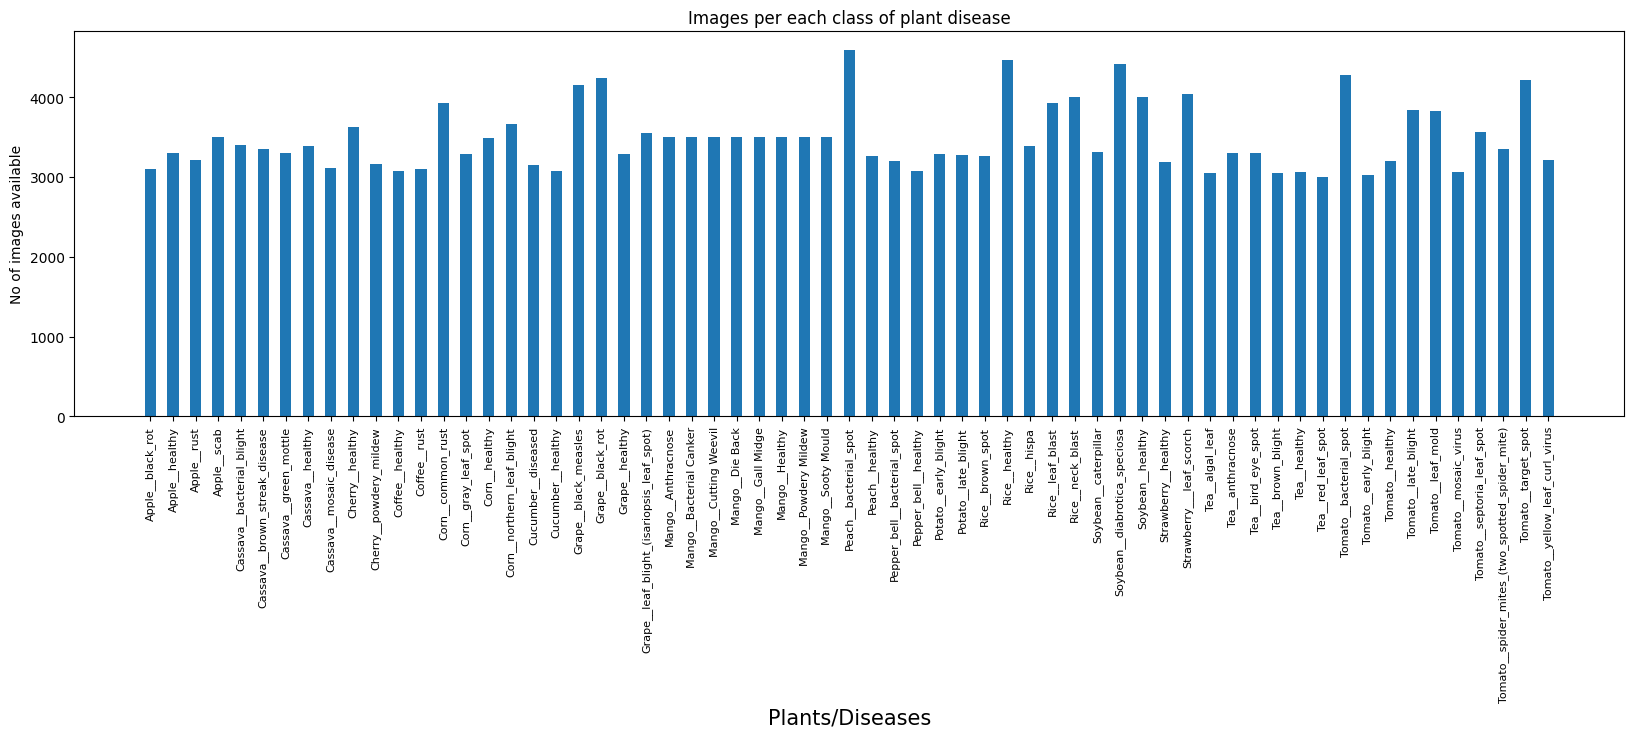

In [11]:
# plotting number of images available for each disease
index = [n for n in range(len(diseases))]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.5)
plt.xlabel('Plants/Diseases', fontsize=15)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=8, rotation=90)
plt.title('Images per each class of plant disease')

In [12]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 219443 images for training


Preparing data for trainning

In [13]:
batch_size = 16
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'C:/code/pytorch_course/plant_disease/Data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/code/pytorch_course/plant_disease/Data\\train'

In [ ]:
class_names = image_datasets['train'].classes

NameError: name 'image_datasets' is not defined

In [ ]:
# for viewing some images from training dataset
def show_image(image, label):
    print("Label :" + class_names + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')

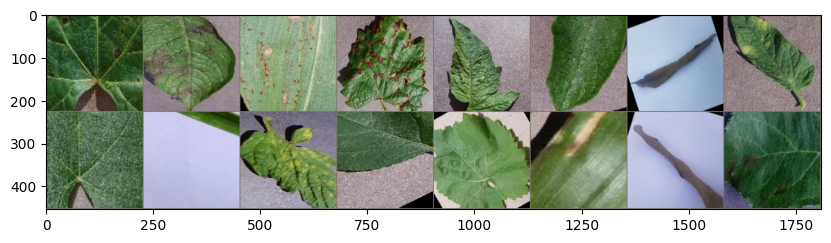

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.figure(figsize=(10,20))
    plt.imshow(inp)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out =make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# Setting the seed value and batch size
random_seed = 7
torch.manual_seed(random_seed)

In [ ]:
# for training
torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    print("1")
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in (range(num_epochs)):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in tqdm(dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
INPUT_SHAPE = (3, 256, 256)
print(summary(model_ft.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------


100%|██████████| 4397/4397 [05:56<00:00, 12.32it/s]


train Loss: 0.4688 Acc: 0.8524


100%|██████████| 1128/1128 [00:58<00:00, 19.15it/s]


val Loss: 0.1754 Acc: 0.9346

Epoch 1/9
----------


100%|██████████| 4397/4397 [06:00<00:00, 12.19it/s]


train Loss: 0.2339 Acc: 0.9166


100%|██████████| 1128/1128 [00:57<00:00, 19.70it/s]


val Loss: 0.1416 Acc: 0.9450

Epoch 2/9
----------


100%|██████████| 4397/4397 [06:02<00:00, 12.11it/s]


train Loss: 0.1934 Acc: 0.9307


100%|██████████| 1128/1128 [00:57<00:00, 19.78it/s]


val Loss: 0.1393 Acc: 0.9480

Epoch 3/9
----------


100%|██████████| 4397/4397 [06:00<00:00, 12.21it/s]


train Loss: 0.1694 Acc: 0.9392


100%|██████████| 1128/1128 [00:58<00:00, 19.38it/s]


val Loss: 0.1242 Acc: 0.9538

Epoch 4/9
----------


100%|██████████| 4397/4397 [06:04<00:00, 12.05it/s]


train Loss: 0.1582 Acc: 0.9433


100%|██████████| 1128/1128 [00:58<00:00, 19.22it/s]


val Loss: 0.1147 Acc: 0.9562

Epoch 5/9
----------


100%|██████████| 4397/4397 [05:10<00:00, 14.14it/s]


train Loss: 0.1422 Acc: 0.9489


100%|██████████| 1128/1128 [00:48<00:00, 23.15it/s]


val Loss: 0.1164 Acc: 0.9566

Epoch 6/9
----------


100%|██████████| 4397/4397 [04:57<00:00, 14.76it/s]


train Loss: 0.1329 Acc: 0.9532


100%|██████████| 1128/1128 [00:49<00:00, 22.75it/s]


val Loss: 0.1360 Acc: 0.9500

Epoch 7/9
----------


100%|██████████| 4397/4397 [04:56<00:00, 14.81it/s]


train Loss: 0.1069 Acc: 0.9614


100%|██████████| 1128/1128 [00:48<00:00, 23.25it/s]


val Loss: 0.1101 Acc: 0.9613

Epoch 8/9
----------


100%|██████████| 4397/4397 [04:54<00:00, 14.91it/s]


train Loss: 0.0974 Acc: 0.9651


100%|██████████| 1128/1128 [00:46<00:00, 24.03it/s]


val Loss: 0.1107 Acc: 0.9612

Epoch 9/9
----------


100%|██████████| 4397/4397 [04:46<00:00, 15.32it/s]


train Loss: 0.0929 Acc: 0.9673


100%|██████████| 1128/1128 [00:45<00:00, 25.04it/s]

val Loss: 0.1114 Acc: 0.9618

Training complete in 63m 43s
Best val Acc: 0.961824


In [ ]:
torch.save(model_ft.state_dict(),"C:/code/pytorch_course/plant_disease/Model/resnet18_final.pt")

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_true=[]
y_preds = []
model_ft.eval()
with torch.inference_mode():
  for X, y in tqdm(dataloaders["val"], desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_ft(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
    y_true.append(y)
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_true)

Making predictions:   0%|          | 0/1128 [00:03<?, ?it/s]

37


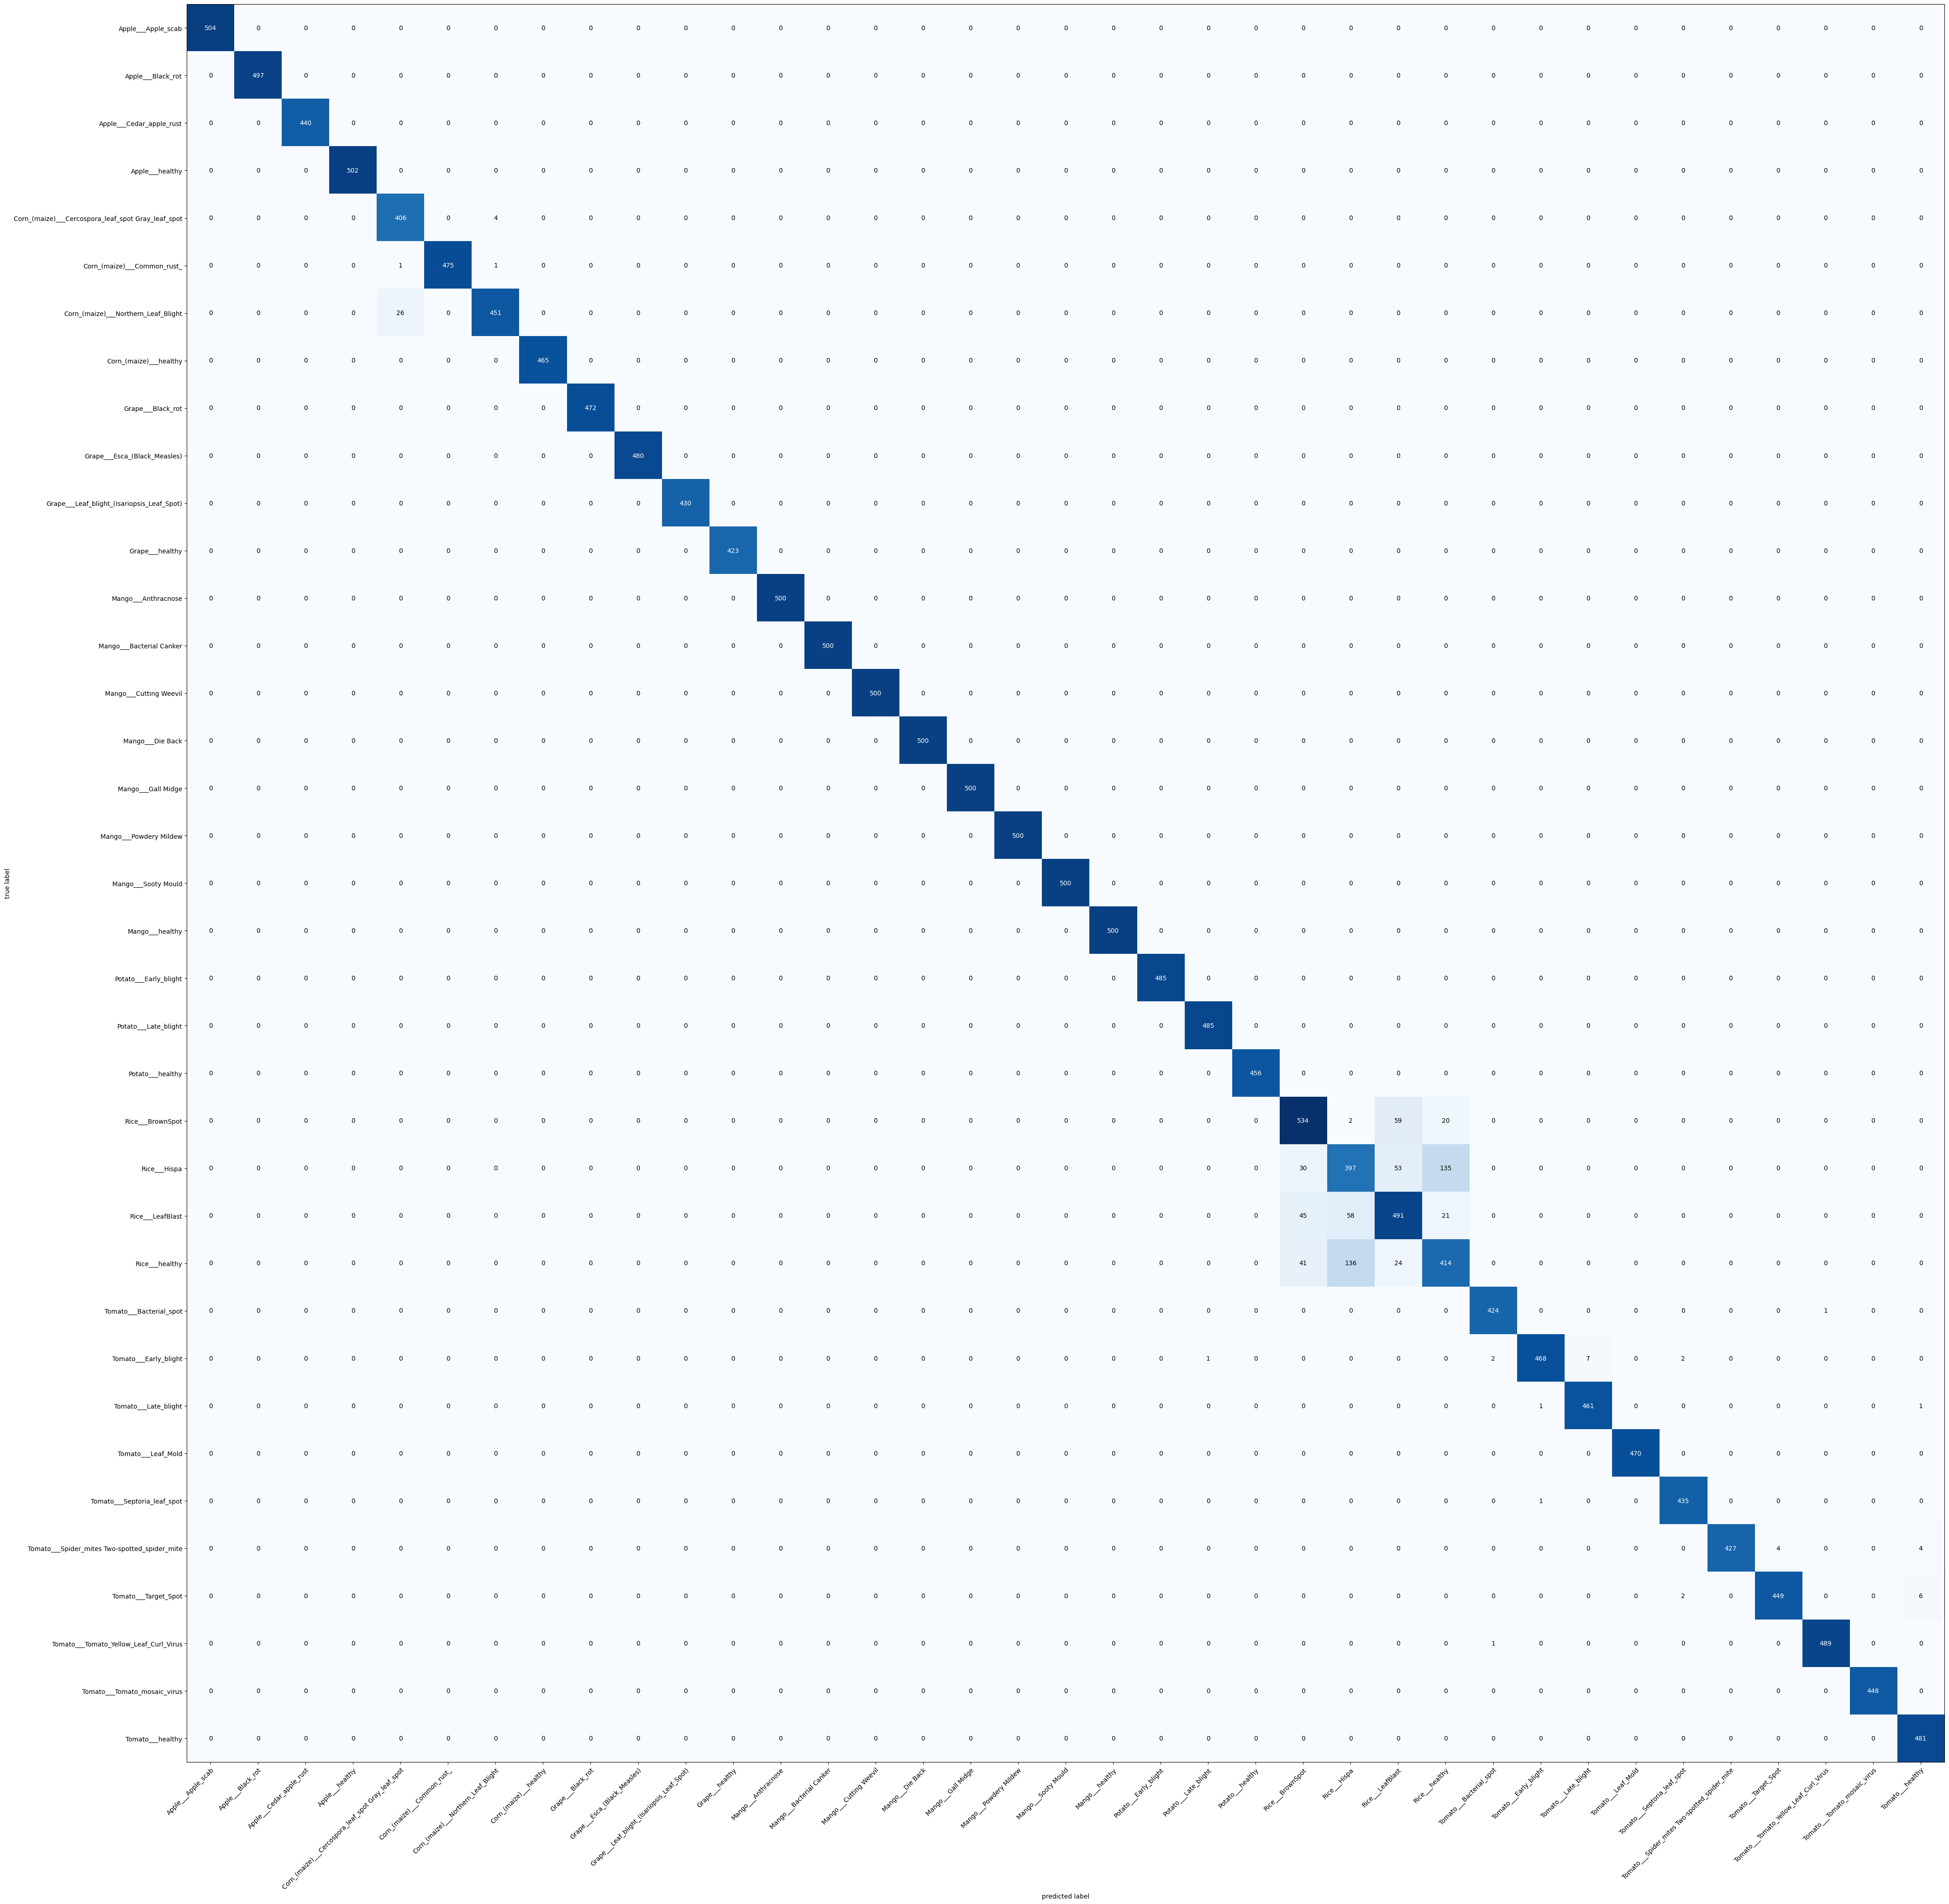

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

print(len(class_names))
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor.cpu())

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(100, 50)
)